# 4.9.2 Data Visualization

## The script contains the following points

### 01. Importing Libraries and Loading Files
### 02. Creating Bar Chart
### 03. Creating Histogram and Scatterplot
### 04. Creating Line Charts
### 05. Order Hour of Day Histogram
### 06. Loyalty Flag Bar Chart
### 07. Prices Hour of Day
### 08. Age and Family of Customers
### 09. Age and Spending Power Scatterplot

## 01. Importing Libraries and Loading Files

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Creating path variable for loading flies
path = r'C:\Users\widne\Documents\CareerFoundry Exercises\Data_Immersion\Achievement 4\03-2024 Instacart Basket Analysis'

# Loading orders_products_customers.pkl to df_master dataframe
df_master = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [3]:
# Checking df_master
df_master.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,average_spend,spender_flag,median_frequency,frequency_flag,state,age,number_of_dependents,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,both


## 02. Creating Bar Chart

<Axes: xlabel='order_day_of_week'>

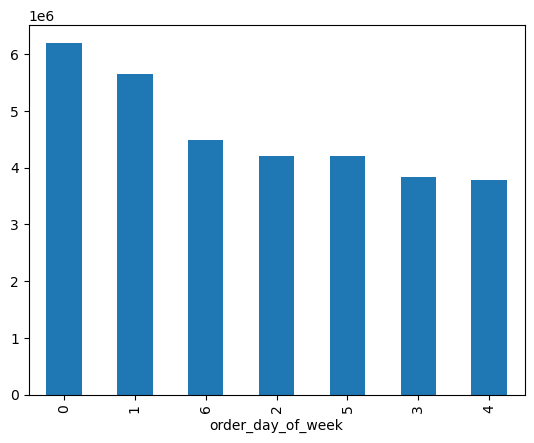

In [4]:
# Create a bar chart
df_master['order_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='order_day_of_week'>

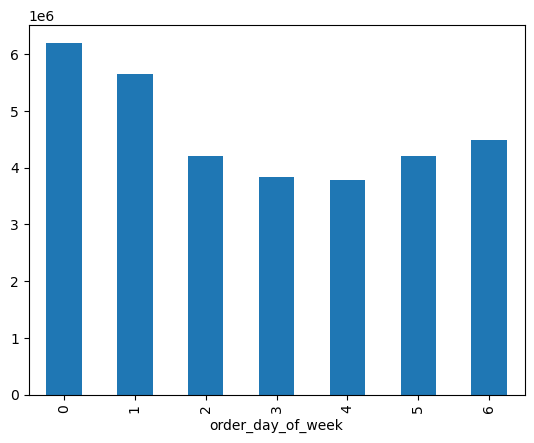

In [5]:
# Sorting dow by index
df_master['order_day_of_week'].value_counts().sort_index().plot.bar()

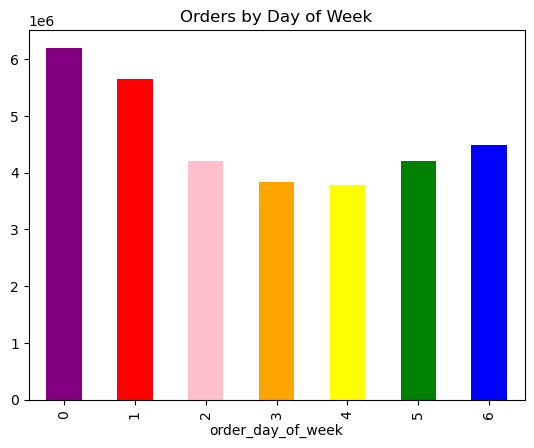

In [4]:
# Adding color to bar chart
bar = df_master['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'], title='Orders by Day of Week')

In [5]:
# Exporting bar graph
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

## 03. Creating Histogram and Scatterplot

<Axes: ylabel='Frequency'>

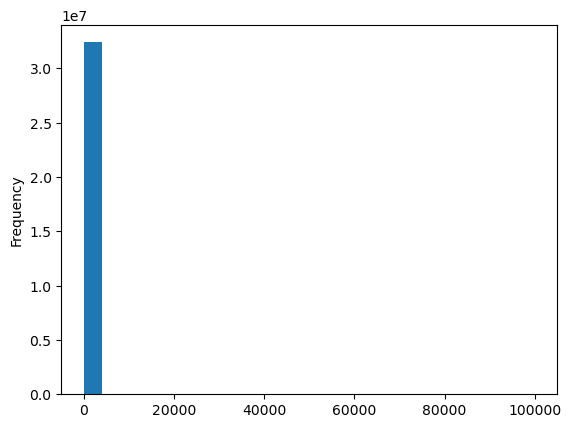

In [9]:
# Creating histogram of prices
df_master['prices'].plot.hist(bins = 25)

In [10]:
df_master['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [11]:
df_master['prices'].mean()

11.980225638383386

In [12]:
df_master['prices'].median()

7.4

In [13]:
df_master['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

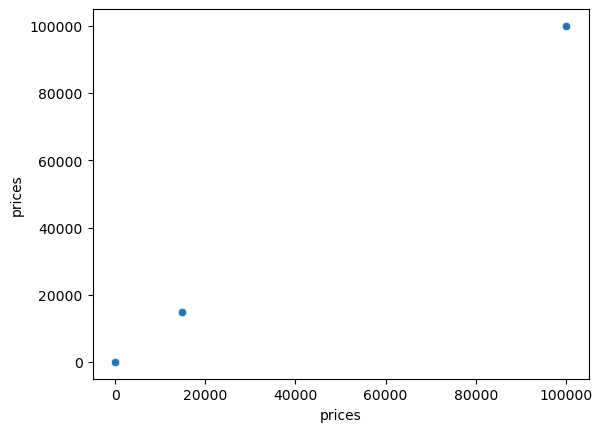

In [14]:
# Creating scatterplot
sns.scatterplot(x = 'prices', y = 'prices', data = df_master)

In [8]:
# Fixing outliers in df_master
df_master.loc[df_master['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,max_order,loyalty_flag,average_spend,spender_flag,median_frequency,frequency_flag,state,age,number_of_dependents,income
7805,1435153,1519,26,2,11,6.0,False,21553,15,0,...,47,Loyal customer,50.932895,High spender,6.0,Frequent customer,Rhode Island,68,0,177864
7806,1066435,1519,32,3,10,5.0,False,21553,28,1,...,47,Loyal customer,50.932895,High spender,6.0,Frequent customer,Rhode Island,68,0,177864
15143,1697208,2409,33,1,19,5.0,False,21553,1,0,...,48,Loyal customer,35.233761,High spender,5.0,Frequent customer,Hawaii,55,2,230074
20264,965345,3531,27,2,19,8.0,False,33664,2,0,...,29,Regular customer,267.469870,High spender,8.0,Frequent customer,Hawaii,80,2,233776
20497,2943740,3793,1,2,9,NaN,True,21553,3,0,...,18,Regular customer,71.191102,High spender,14.0,Regular customer,Louisiana,59,3,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303726,3265389,51346,4,1,17,13.0,False,33664,2,1,...,5,New customer,6390.138298,High spender,13.0,Regular customer,Rhode Island,58,1,207497
32307809,1179092,131671,12,4,9,15.0,False,33664,1,0,...,13,Regular customer,3453.431034,High spender,13.0,Regular customer,Rhode Island,35,0,86490
32310737,1226705,39667,7,2,15,20.0,False,33664,14,0,...,7,New customer,1223.879268,High spender,23.0,Non-frequent customer,Rhode Island,78,2,195077
32329975,3000037,95105,2,4,19,22.0,False,33664,4,0,...,4,New customer,11772.100000,High spender,6.0,Frequent customer,South Carolina,48,2,398880


In [2]:
# Changing all prices above 100 as nan
df_master.loc[df_master['prices'] > 100, 'prices'] = np.nan

In [3]:
# Checking new max value
df_master['prices'].max()

25.0

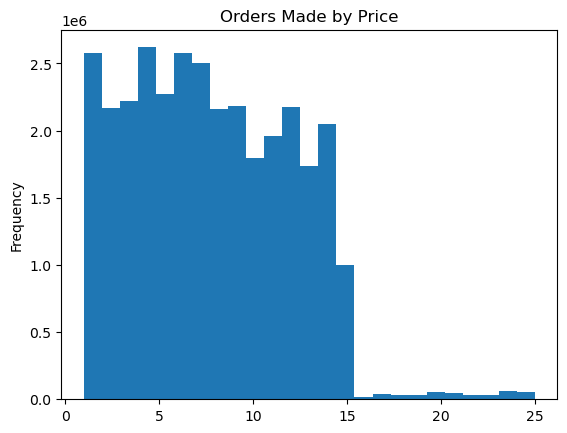

In [6]:
# Creating Histogram
hist = df_master['prices'].plot.hist(bins = 25, title='Orders Made by Price')

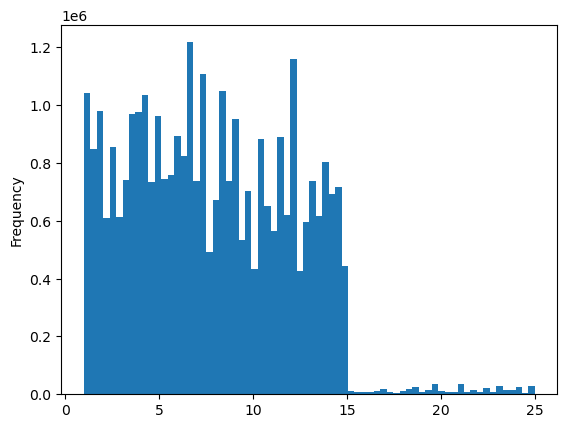

In [19]:
# Histogram with more granularity
hist_2 = df_master['prices'].plot.hist(bins = 70)

In [7]:
# Exporting histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

## 04. Creating Line Charts

C:\Users\widne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\widne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


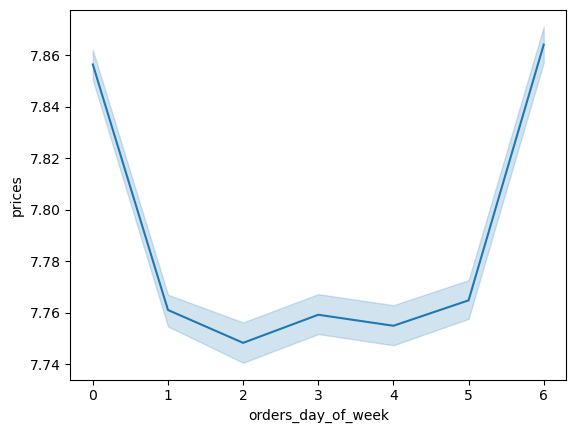

In [28]:
# Creating line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [29]:
# Exporting line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_orders_day_of_week_prices.png'))

## 05. Order Hour of Day Histogram

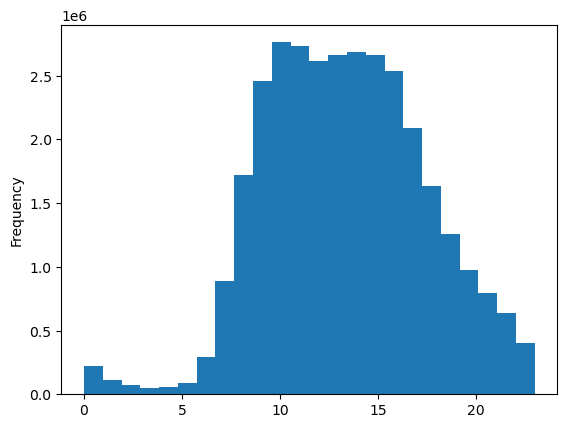

In [4]:
# Creating histogram
hist = df_master['order_hour_of_day'].plot.hist(bins = 24)

This histogram demonstrates the frequency of orders made for each hour of the day. It looks like there are a small amount of orders made between 12am to 6am, then the orders increase until about 4pm where it then declines in the evening.

In [5]:
# Exporting histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

## 06. Loyalty Flag Bar Chart

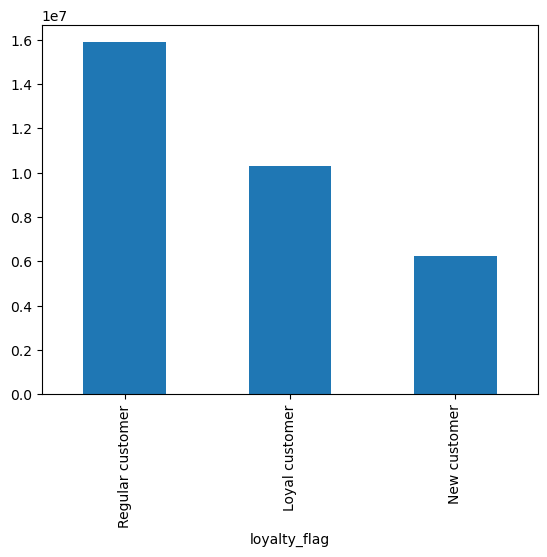

In [36]:
# Creating loyalty_flag bar chart
bar = df_master['loyalty_flag'].value_counts().plot.bar()

In [37]:
# Exporting loyalty_flag bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

## 07. Prices Hour of Day

In [9]:
# Creating list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_master)) <= 0.7

In [10]:
# Storing 70% of the sample in the big dataframe
big = df_master[dev]

In [11]:
# Storing 30% of the sample in the small dataframe
small = df_master[~dev]

In [12]:
df = small[['order_hour_of_day','prices']]

C:\Users\widne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\widne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: Line2D.set() got an unexpected keyword argument 'title'

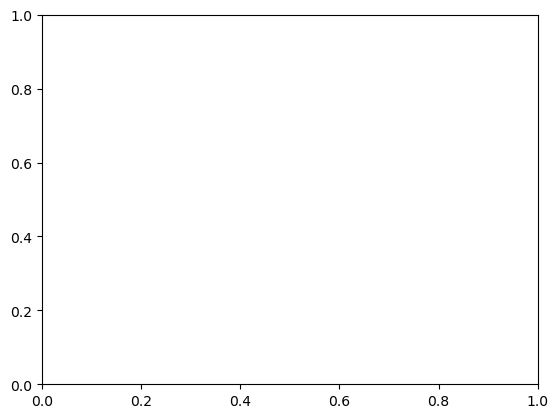

In [13]:
line = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices', title='Customer Spending by Hour of Day')

In [7]:
# Exporting line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_hour_of_day_prices.png'))

## 08. Age and Family of Customers

In [7]:
# Using small sample to find connection between age and number_of_dependents
df = small[['age','number_of_dependents']]

C:\Users\widne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\widne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


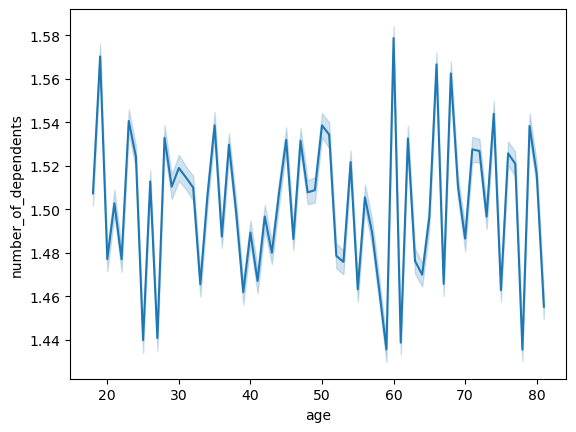

In [8]:
# Creating line chart
line = sns.lineplot(data = df, x = 'age', y = 'number_of_dependents')

The line chart shows the average number of dependents each age has. There does not seem to be a signigicant relationship with age and dependents.

In [9]:
# Exporting line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependents.png'))

## 09. Age and Spending Power Scatterplot

In [13]:
# Creating dataframe for faster processing time
df = df_master[['age','income']]

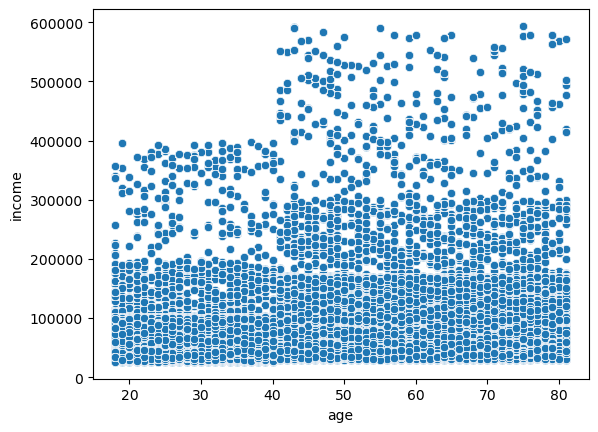

In [15]:
# Creating scatterplot
scatter = sns.scatterplot(x = 'age', y = 'income', data = df)

The scatterplot shows the relationshop between age and the amount of income for customers. It seems there is a slight relationship where the older the customer, the higher income they have.

In [16]:
# Exporting scatterplot
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))